In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

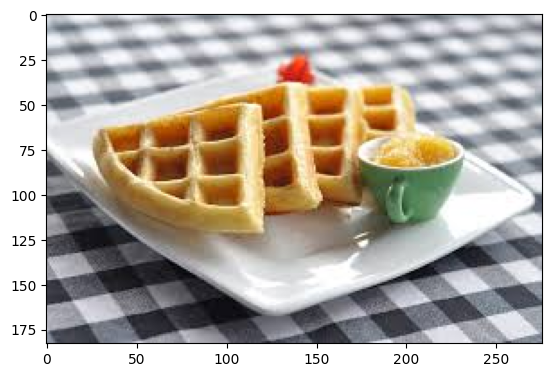

In [2]:
# Read in the image
image = cv2.imread('..\\images\\waffle.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

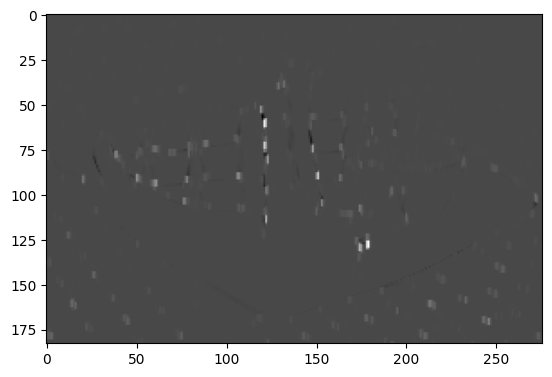

In [3]:
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = gray.astype(np.float32)

# Detect Corner
dst = cv2.cornerHarris(gray, 2, 3, k=0.04)
dst = cv2.dilate(dst, (2,2), iterations=3)

plt.imshow(dst, cmap="gray")

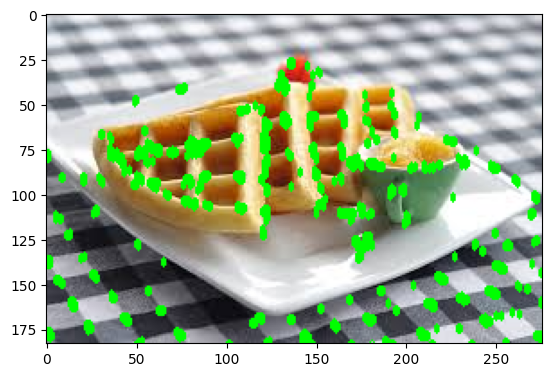

In [96]:
thresh = 0.01 * dst.max()
corner_image = np.copy(image_copy)

for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if dst[j,i] > thresh:
            cv2.circle(corner_image, (i,j), 1, (0,255,0), 1)

plt.imshow(corner_image)